# Create Train, Test, Val folder

In [ ]:
!unzip Trashnet.zip #file.zip

Archive:  Trashnet.zip
   creating: Trashnet/dataset-resized/
  inflating: Trashnet/dataset-resized/.DS_Store  
   creating: Trashnet/dataset-resized/cardboard/
  inflating: Trashnet/dataset-resized/cardboard/cardboard1.jpg  
  inflating: Trashnet/dataset-resized/cardboard/cardboard10.jpg  
  inflating: Trashnet/dataset-resized/cardboard/cardboard100.jpg  
  inflating: Trashnet/dataset-resized/cardboard/cardboard101.jpg  
  inflating: Trashnet/dataset-resized/cardboard/cardboard102.jpg  
  inflating: Trashnet/dataset-resized/cardboard/cardboard103.jpg  
  inflating: Trashnet/dataset-resized/cardboard/cardboard104.jpg  
  inflating: Trashnet/dataset-resized/cardboard/cardboard105.jpg  
  inflating: Trashnet/dataset-resized/cardboard/cardboard106.jpg  
  inflating: Trashnet/dataset-resized/cardboard/cardboard107.jpg  
  inflating: Trashnet/dataset-resized/cardboard/cardboard108.jpg  
  inflating: Trashnet/dataset-resized/cardboard/cardboard109.jpg  
  inflating: Trashnet/dataset-resized/

In [ ]:
import os
os.listdir(os.path.join(os.getcwd(),"/content/Trashnet/dataset-resized"))

['metal', 'plastic', 'paper', 'glass', 'cardboard', 'trash', '.DS_Store']

In [ ]:
def split_indices(folder,seed1,seed2):
    n = len(os.listdir(folder))
    full_set = list(range(1,n+1))

    ## Getting train indices
    random.seed(seed1)
    train = random.sample(list(range(1,n+1)),int(.8*n))

    ## Temporary use
    remain = list(set(full_set)-set(train))

    ## Separate the remaining amount into validation and test data
    random.seed(seed2)
    valid = random.sample(remain,int(.5*len(remain)))
    test = list(set(remain)-set(valid))

    return(train,valid,test)

## Gets the file names for a specific type of material, given the indices
    ## Input: material category and its indices
    ## Output: The file names
def get_names(waste_type,indices):
    file_names = [waste_type+str(i)+".jpg" for i in indices]
    return(file_names)

## Moves the group of source files into a new folder
    ## Input: A list of the source files and the destination folder
    ## There is no output
def move_files(source_files,destination_folder):
    for file in source_files:
        shutil.move(file,destination_folder)

In [ ]:
## The paths will look like "train/cardboard" and like that for the rest
import random
import shutil
subsets = ['train','valid', 'test']
waste_types = ['cardboard','glass','metal','paper','plastic','trash']

## Creating the destination fodlers for a subset of the data and waste types
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join('data',subset,waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)

## Move the files into the new destination folder

for waste_type in waste_types:
    source_folder = os.path.join('/content/Trashnet/dataset-resized',waste_type)
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)

    ## Move the source files to train
    train_names = get_names(waste_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "data/train/"+waste_type
    move_files(train_source_files,train_dest)

    ## Move source files to validation data
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    valid_dest = "data/valid/"+waste_type
    move_files(valid_source_files,valid_dest)

    ## Move source files to test data
    test_names = get_names(waste_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    ## A test destination where the files will go so that it's not mixed up
    test_dest = "data/test/"+waste_type
    move_files(test_source_files,test_dest)


In [ ]:
!zip -r /content/datafinal.zip /content/data

  adding: content/data/ (stored 0%)
  adding: content/data/valid/ (stored 0%)
  adding: content/data/valid/metal/ (stored 0%)
  adding: content/data/valid/metal/metal313.jpg (deflated 2%)
  adding: content/data/valid/metal/metal386.jpg (deflated 3%)
  adding: content/data/valid/metal/metal341.jpg (deflated 2%)
  adding: content/data/valid/metal/metal21.jpg (deflated 2%)
  adding: content/data/valid/metal/metal121.jpg (deflated 3%)
  adding: content/data/valid/metal/metal211.jpg (deflated 4%)
  adding: content/data/valid/metal/metal40.jpg (deflated 2%)
  adding: content/data/valid/metal/metal124.jpg (deflated 6%)
  adding: content/data/valid/metal/metal198.jpg (deflated 4%)
  adding: content/data/valid/metal/metal165.jpg (deflated 6%)
  adding: content/data/valid/metal/metal72.jpg (deflated 1%)
  adding: content/data/valid/metal/metal289.jpg (deflated 1%)
  adding: content/data/valid/metal/metal129.jpg (deflated 2%)
  adding: content/data/valid/metal/metal320.jpg (deflated 1%)
  adding:

# Imports

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix
import random
import matplotlib.pyplot as plt
import matplotlib.image as imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setup




In [ ]:
!unzip datafinal.zip #file.zip

Archive:  datafinal.zip
   creating: content/data/
   creating: content/data/valid/
   creating: content/data/valid/metal/
  inflating: content/data/valid/metal/metal313.jpg  
  inflating: content/data/valid/metal/metal386.jpg  
  inflating: content/data/valid/metal/metal341.jpg  
  inflating: content/data/valid/metal/metal21.jpg  
  inflating: content/data/valid/metal/metal121.jpg  
  inflating: content/data/valid/metal/metal211.jpg  
  inflating: content/data/valid/metal/metal40.jpg  
  inflating: content/data/valid/metal/metal124.jpg  
  inflating: content/data/valid/metal/metal198.jpg  
  inflating: content/data/valid/metal/metal165.jpg  
  inflating: content/data/valid/metal/metal72.jpg  
  inflating: content/data/valid/metal/metal289.jpg  
  inflating: content/data/valid/metal/metal129.jpg  
  inflating: content/data/valid/metal/metal320.jpg  
  inflating: content/data/valid/metal/metal233.jpg  
  inflating: content/data/valid/metal/metal155.jpg  
  inflating: content/data/valid/

In [ ]:
from fastai.vision.all import *
from fastai.metrics import accuracy

# Directory paths
folder_path = '/content/content/data'
test_path = folder_path + "/test/"
train_path = folder_path + "/train/"
valid_path = folder_path + "/valid/"


In [ ]:
# Data Augmentation and Loading
data = ImageDataLoaders.from_folder(
    folder_path,
    train='train',
    valid='valid',
    test='test',
    item_tfms=[Resize(460), RandomResizedCrop(224, min_scale=0.35)],
    batch_tfms=aug_transforms(flip_vert=True, max_rotate=30.0),
)


In [ ]:
# Model Definition using ResNet50
learn = cnn_learner(data, resnet50, metrics=accuracy)

# Training the Model
learn.fine_tune(20)

# Exporting the Model as PKL file
learn.export(fname='/content/trained_model.pkl')

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 70.7MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.573912,0.590699,0.789683,00:27


epoch,train_loss,valid_loss,accuracy,time
0,0.764631,0.461676,0.837302,00:25
1,0.666828,0.386935,0.849206,00:26
2,0.571455,0.374474,0.873016,00:25
3,0.495616,0.359831,0.908730,00:28
4,0.439925,0.328823,0.912698,00:26
5,0.384774,0.296577,0.916667,00:25
6,0.340196,0.327956,0.896825,00:26
7,0.280793,0.281704,0.924603,00:25
8,0.244415,0.265820,0.928571,00:25
9,0.210288,0.259184,0.924603,00:25


In [ ]:
os.listdir(train_path)

['metal', 'glass', 'plastic', 'paper', 'cardboard', 'trash']

(384, 512, 3)


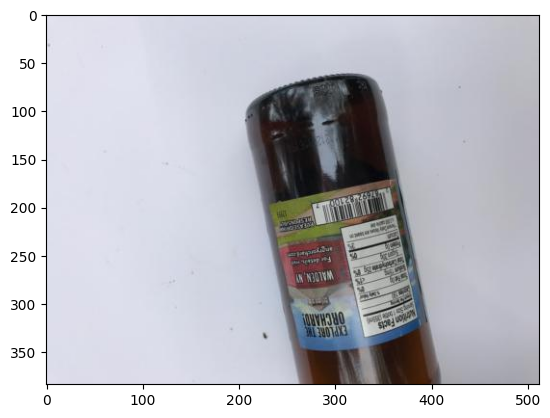

In [ ]:
glass_img_path = train_path + '/glass/' + os.listdir(train_path+'/glass/')[0]
glass_img = plt.imread(glass_img_path)
plt.imshow(glass_img)
print(glass_img.shape)

(384, 512, 3)


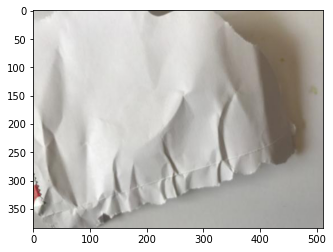

In [ ]:
paper_img_path = train_path + '/paper/' + os.listdir(train_path+'/paper/')[0]
paper_img = plt.imread(paper_img_path)
plt.imshow(paper_img)
print(paper_img.shape)

(384, 512, 3)


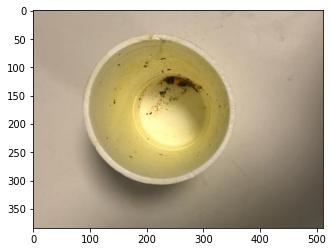

In [ ]:
trash_img_path = train_path + '/trash/' + os.listdir(train_path+'/trash/')[0]
trash_img = plt.imread(trash_img_path)
plt.imshow(trash_img)
print(trash_img.shape)

(384, 512, 3)


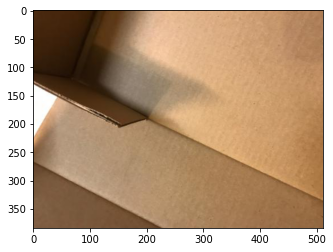

In [ ]:
cardboard_img_path = train_path + '/cardboard/' + os.listdir(train_path+'/cardboard/')[0]
cardboard_img = plt.imread(cardboard_img_path)
plt.imshow(cardboard_img)
print(trash_img.shape)

(384, 512, 3)


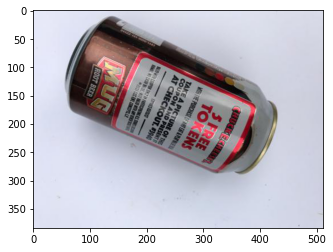

In [ ]:
metal_img_path = train_path + '/metal/' + os.listdir(train_path+'/metal/')[0]
metal_img = plt.imread(metal_img_path)
plt.imshow(metal_img)
print(metal_img.shape)

(384, 512, 3)


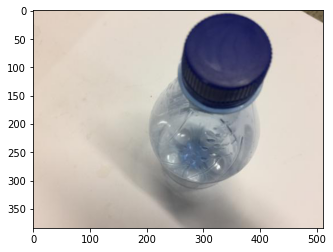

In [ ]:
plastic_img_path = train_path + '/plastic/' + os.listdir(train_path+'/plastic/')[0]
plastic_img = plt.imread(plastic_img_path)
plt.imshow(plastic_img)
print(plastic_img.shape)

In [ ]:
print("glass: ", len(os.listdir(train_path+'/glass')))
print("paper: ", len(os.listdir(train_path+'/paper')))
print("trash: ", len(os.listdir(train_path+'/trash')))
print("cardboard: ", len(os.listdir(train_path+'/cardboard')))
print("metal: ", len(os.listdir(train_path+'/metal')))
print("plastic: ", len(os.listdir(train_path+'/plastic')))

glass:  400
paper:  475
trash:  109
cardboard:  322
metal:  328
plastic:  385


In [ ]:
image_shape = (384,512,3)

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
)

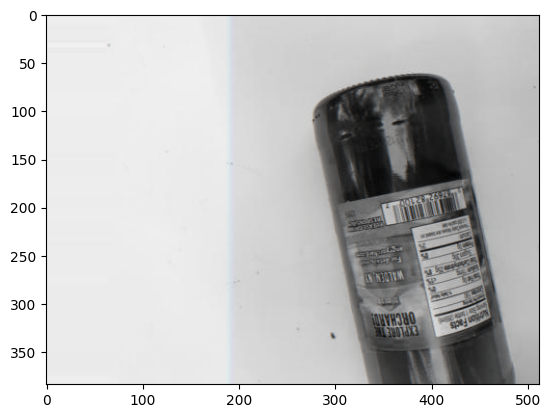

In [ ]:
plt.imshow(image_gen.random_transform(glass_img))